# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import csv as csv
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import statsmodels
import scipy.stats as stats
import statsmodels.stats.proportion as smpt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# LOADING THE DATASET

In [2]:
train = pd.read_csv('application_train.csv')

## SUMMARY STATISTICS

In [3]:
train.describe(include = 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# MISSING VALUES

In [9]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(15,10))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    #ms= ms[ms["Percent"] > 0]
    return ms

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


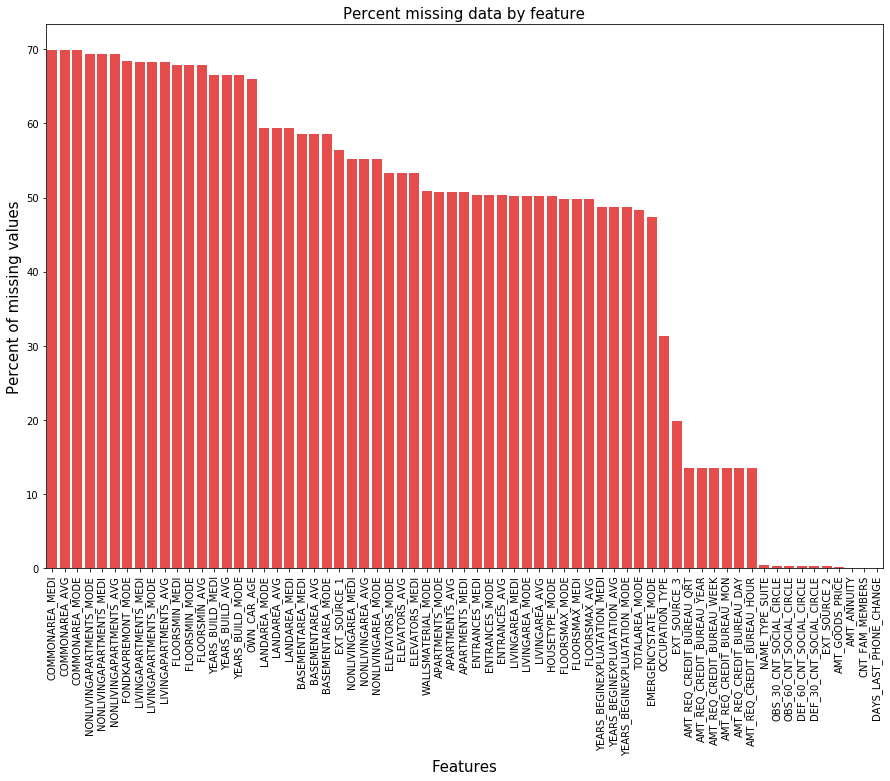

In [10]:
missingdata(train)

# MODIFYING THE SCALE OF FEW FEATURES 

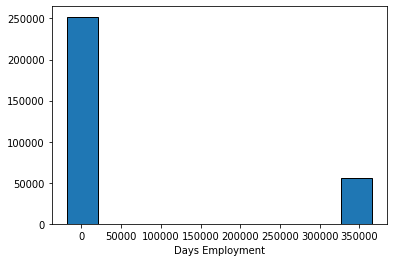

In [8]:
plt.hist(train['DAYS_EMPLOYED'], edgecolor = 'k')
plt.xlabel('Days Employment')
plt.show()

Quite often, we will be dealing with anomalies in the dataset. These may be due to mistyped numbers, errors in measuring equipment, or they could be valid but extreme measurements. One such anomaly is seen in the above graph where we have 55374 records with 365243 as the DAYS_EMPLOYED. So we replaced these 55k records with Nan values and then replaced with the median value.<br>

The numbers in the DAYS_EMPLOYED column are negative because they are recorded relative to the current loan application. To see these stats in years, we multiplied by -1 and divided by the number of days in a year.

In [ ]:
train["DAYS_EMPLOYED"].replace(365243,np.nan,inplace=True)
train["DAYS_EMPLOYED"].median()
train["DAYS_EMPLOYED"].replace(to_replace = np.nan,value = train["DAYS_EMPLOYED"].median(), inplace=True)
train['YEARS_EMPLOYED'] = -train['DAYS_EMPLOYED']/365

The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we multiplied by -1 and divided by the number of days in a year.

In [277]:
train['AGE']  = -train['DAYS_BIRTH']/365

The numbers in the DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE column are negative because they are recorded relative to the current loan application. To see these stats in years, we multiplied by -1 and divided by the number of days in a year.

In [278]:
train['DAYS_ID_PUBLISH'] = -train['DAYS_ID_PUBLISH']
train['DAYS_REGISTRATION'] = -train['DAYS_REGISTRATION']
train["DAYS_LAST_PHONE_CHANGE"]=-train["DAYS_LAST_PHONE_CHANGE"]

In [ ]:
train.drop(['DAYS_EMPLOYED',"DAYS_BIRTH"],axis=1,inplace=True)

# VISUALIZATION OF CATEGORICAL FEATURES W.R.T TARGET

In [216]:
def visualizations(x):
    y = 'TARGET'


    df1 = train.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
    g.ax.set_ylim(0,100)
    g.fig.set_figheight(5)
    g.fig.set_figwidth(15)


    for p in g.ax.patches:
        txt = "       " + str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height() +1
        g.ax.text(txt_x,txt_y,txt)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right'
    #fontsize='medium'  
    )   
    plt.show()
    

# CODE_GENDER

posx and posy should be finite values
posx and posy should be finite values


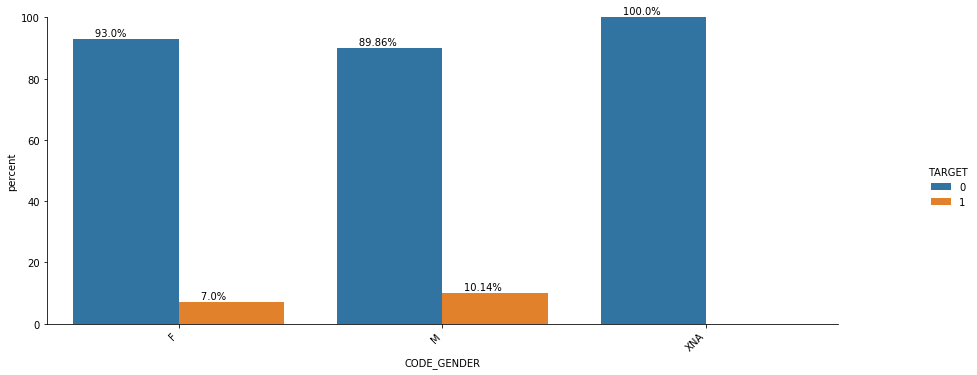

In [231]:
visualizations('CODE_GENDER')

We see that male clients have high percentage of difficulties to repay the loan compared to female clients.
93% of female customers are repaying loan whereas 7% are facing difficulties in repaying the loan.
89.86% of male customers are repaying loan whereas 10.14% are facing difficulties in repaying the loan.

# NAME CONTRACT TYPE

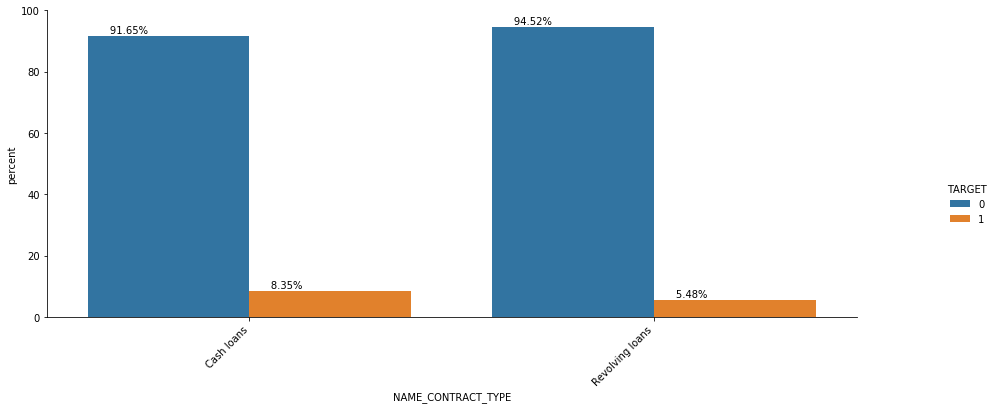

In [232]:
visualizations('NAME_CONTRACT_TYPE')

91.65% of cash loans are repaid properly whereas 8.35% of the loan payments are delayed.
94.52% of revolving loans are repaid properly whereas 5.48% of the loan payments are delayed.

# NAME INCOME TYPE 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


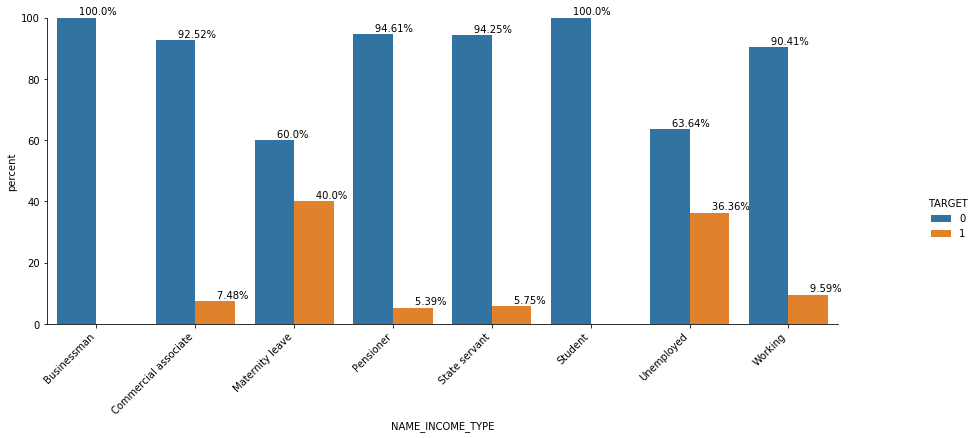

In [233]:
visualizations('NAME_INCOME_TYPE')

We observe that the applicants who are Unemployed have the highest percentage of payment related problems followed by
applicants who are working.

# NAME EDUCATION TYPE

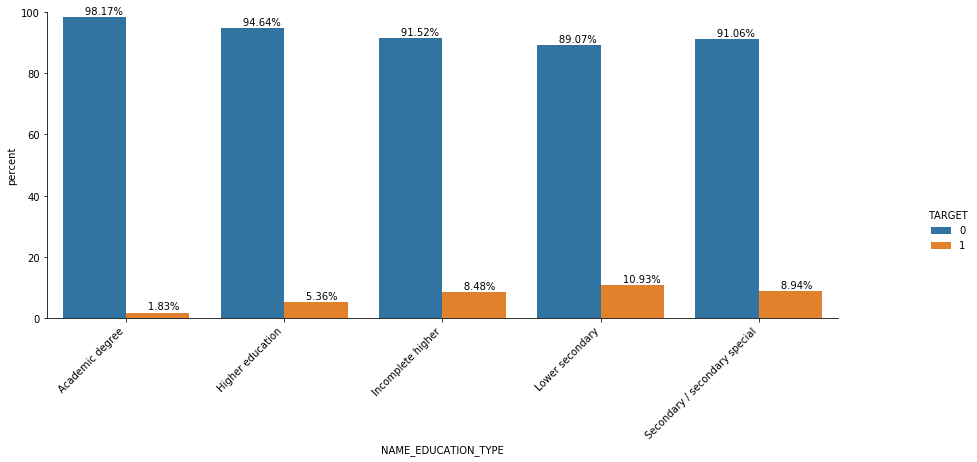

In [234]:
visualizations('NAME_EDUCATION_TYPE')

We observe that the applicants with Lower Secondary education status have the highest percentage of payment related
problems followed by applicants with Secondary/secondary special status.

# NAME FAMILY STATUS

posx and posy should be finite values
posx and posy should be finite values


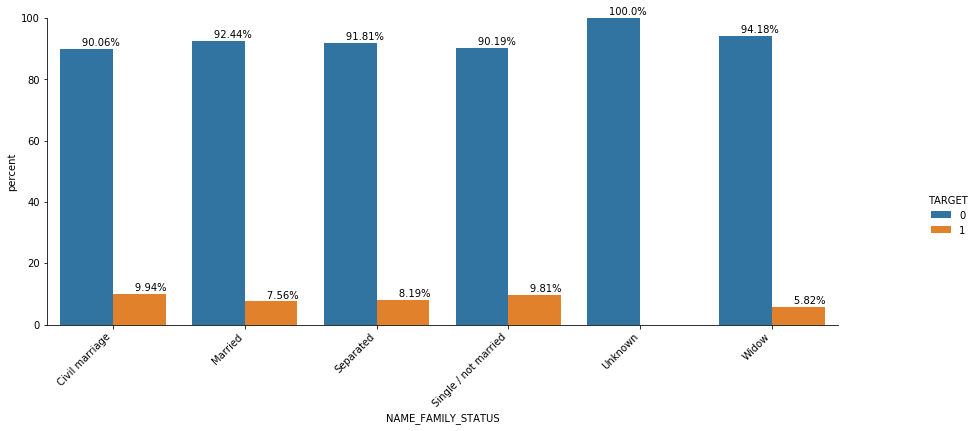

In [235]:
visualizations('NAME_FAMILY_STATUS')

We observe that the applicants with Civil marriage have the highest percentage of payment related problems followed by
applicants who are Single/ not married.

# OCCUPATION TYPE

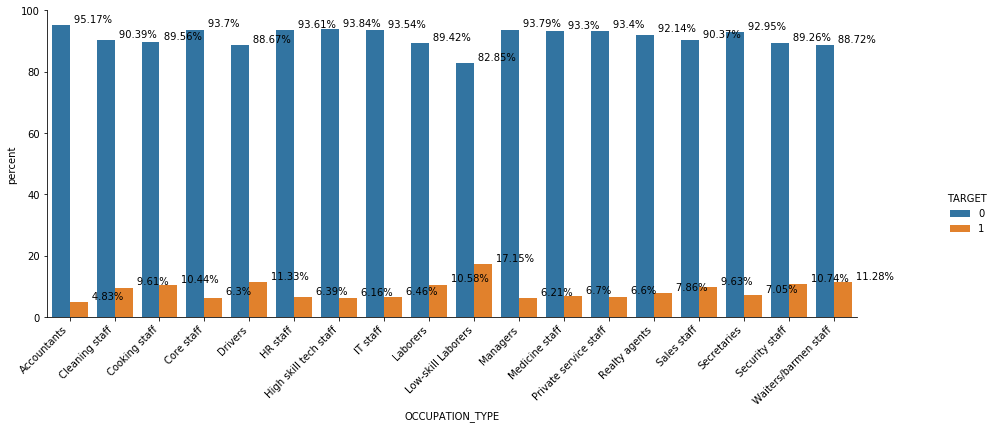

In [236]:
visualizations('OCCUPATION_TYPE')

We observe that the applicants who are Low skill Laborers have the highest percentage of payment related problems
followed by applicants who are drivers and waiters/barmen staff.

# ORGANIZATION TYPE

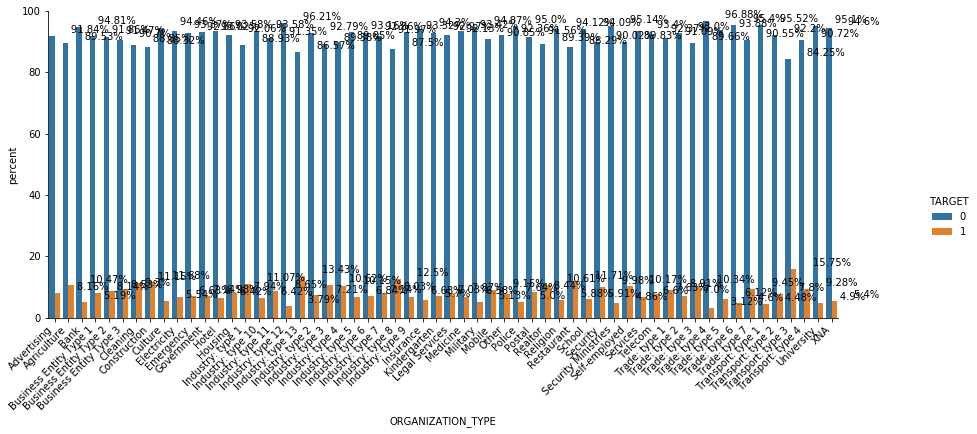

In [237]:
visualizations('ORGANIZATION_TYPE')

We observe that the applicants who are in organization type of Business Entity type 3 have the highest percentage of payment
related problems followed by applicants who are self-employed.

# WALLS MATERIAL MODE

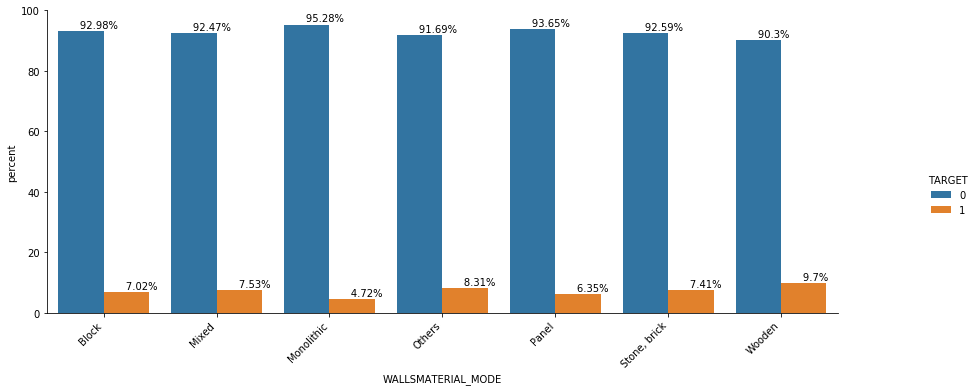

In [238]:
visualizations('WALLSMATERIAL_MODE')

It is clear by looking at the above given plot that clients with walls material mode as Wooden housing were facing difficulties
in repaying the loan.

# FAMILY MEMBERS

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


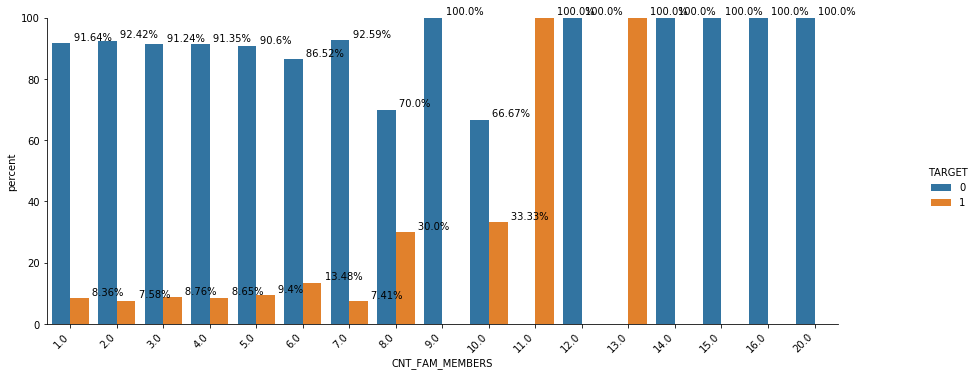

In [239]:
visualizations('CNT_FAM_MEMBERS')

It is clear by looking at the above graph that Families with lesser size are repaying the loan on time and as the size of the
family increased, there are delays in loan repayment. As the records of the families with sizes 14, 15, 16, 20 are only a few
for each size; there is no proper interpretability for these sizes.

# VISUALIZATION OF NUMERICAL FEATURES RELATED TO AMOUNT

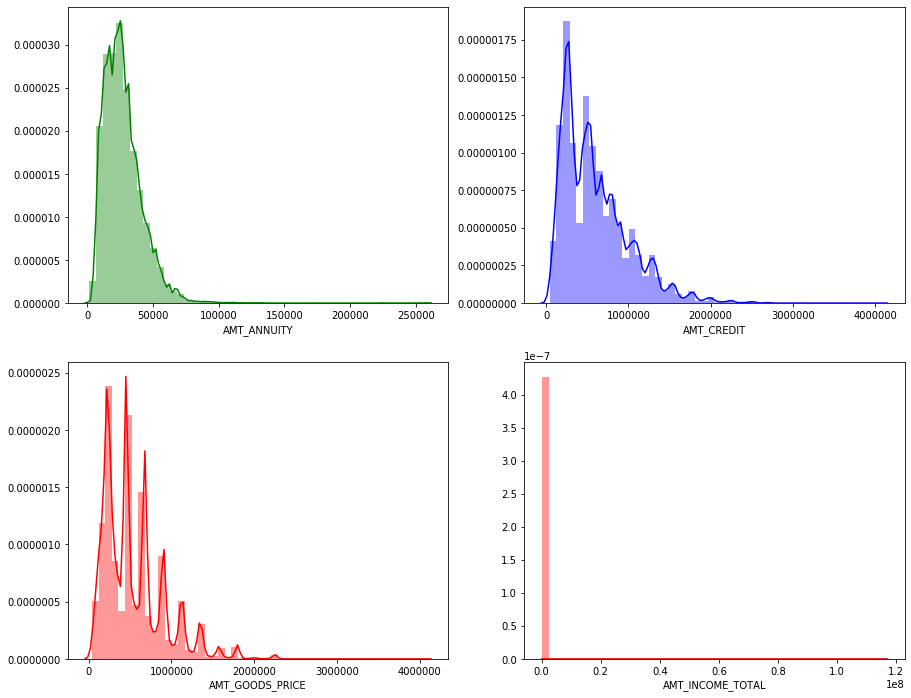

In [274]:
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15,12))

# Graph amt annutiy Satisfaction
sns.distplot(train.AMT_ANNUITY.dropna(), kde=True, color="g", ax=ax[0,0])


# Graph amt credit Evaluation
sns.distplot(train.AMT_CREDIT.dropna(), kde=True, color="b", ax=ax[0,1])

# Graph anaual GOOD PRICE  
sns.distplot(train.AMT_GOODS_PRICE.dropna(), kde=True, color="r", ax=ax[1,0])

sns.distplot(train.AMT_INCOME_TOTAL.dropna(), kde=True, color="r", ax=ax[1,1])

plt.show() 

Most of the customers have an annuity of 50k with credit of around 10L and the goods price worth 10L.
Majority of the customers are having the income around 1-2 lakhs.

# VISUALIZATION OF CATEGORICAL FEATURES

In [280]:
def count(x):
    sns.countplot(train[x])
    plt.xticks(rotation=45,horizontalalignment='right') 
    plt.show()

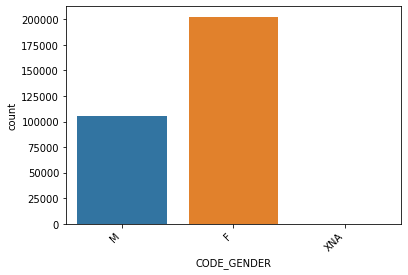

In [281]:
count('CODE_GENDER')

Female applicants are higher in number than male applicants 

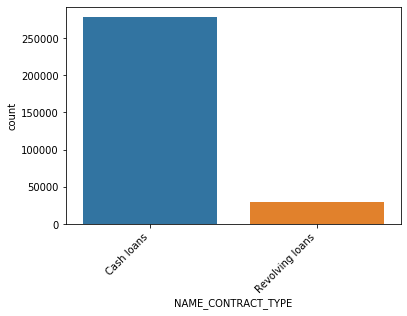

In [282]:
count('NAME_CONTRACT_TYPE')

Applications for Cash loans are higher than those of Revolving loans

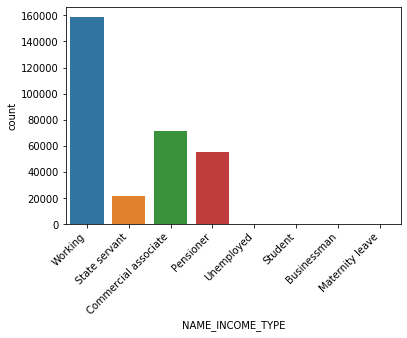

In [283]:
count('NAME_INCOME_TYPE')

More number of applicants have income type as 'WORKING' followed by those of 'COMMERCIAL ASSOCIATE'

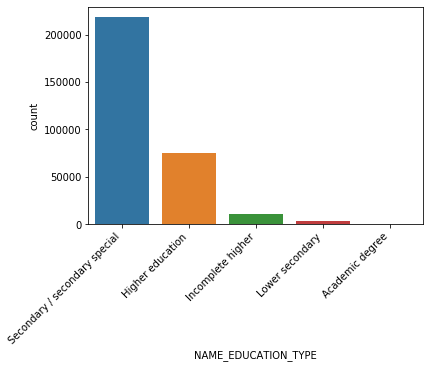

In [284]:
count('NAME_EDUCATION_TYPE')

More number of applicants have education type as 'SECONDARY/SECONDARY SPECIAL' followed by those of 'HIGHER EDUCATION'

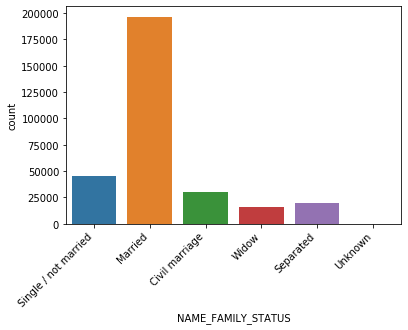

In [287]:
count('NAME_FAMILY_STATUS')

More number of applicants are married

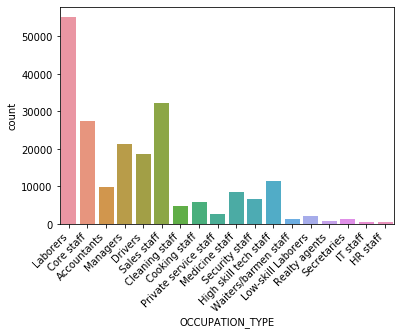

In [289]:
count('OCCUPATION_TYPE')

Higher number of applicants are Laborers followed by Core Staff

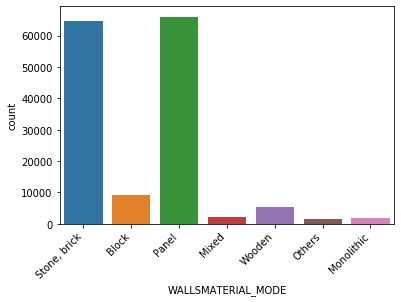

In [291]:
count('WALLSMATERIAL_MODE')

Higher number of applicants have homes with wall material as 'Panel' followed by 'Bricks'

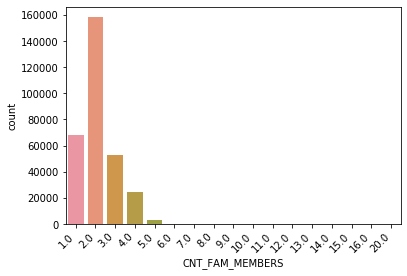

In [294]:
count('CNT_FAM_MEMBERS')

Higher number of applicants have family size as 2

# KDE VISUALIZATION OF NUMERICAL FEATURES RELATED TO AMOUNT

In [240]:
def kde_target(var_name):
    df = train
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)
    plt.show()

The correlation between AMT_INCOME_TOTAL and the TARGET is -0.0040
Median value for loan that was not repaid = 135000.0000
Median value for loan that was repaid =     148500.0000


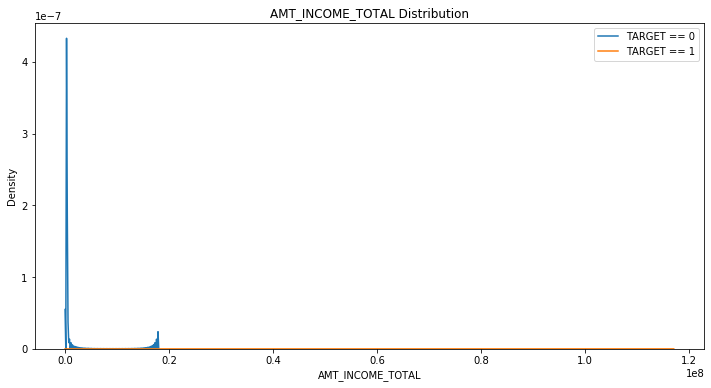

In [275]:
kde_target('AMT_INCOME_TOTAL')

The correlation between AMT_CREDIT and the TARGET is -0.0304
Median value for loan that was not repaid = 497520.0000
Median value for loan that was repaid =     517788.0000


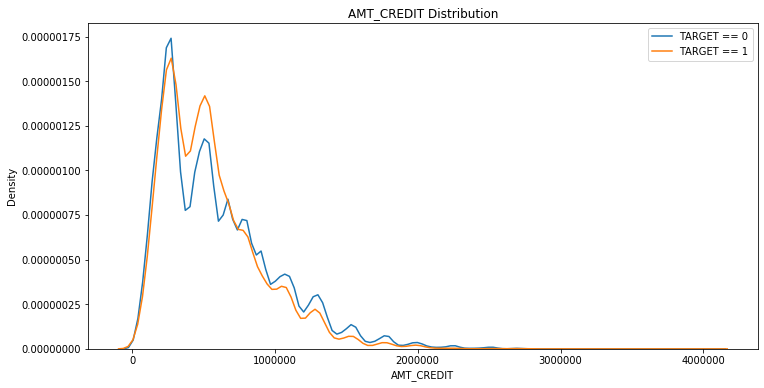

In [262]:
kde_target('AMT_CREDIT')

The correlation between AMT_ANNUITY and the TARGET is -0.0128
Median value for loan that was not repaid = 25263.0000
Median value for loan that was repaid =     24876.0000


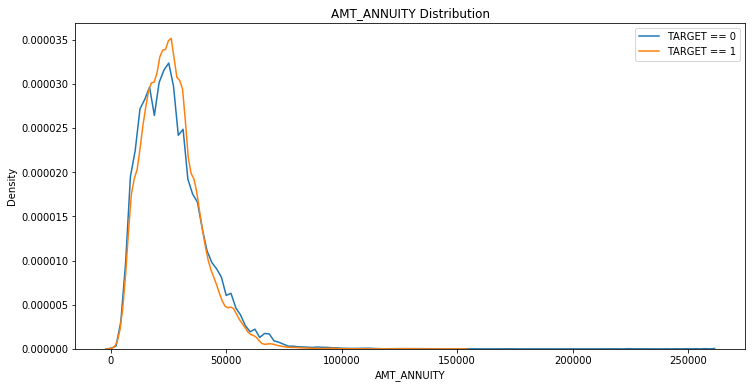

In [246]:
kde_target('AMT_ANNUITY')

The correlation between AMT_GOODS_PRICE and the TARGET is -0.0396
Median value for loan that was not repaid = 450000.0000
Median value for loan that was repaid =     450000.0000


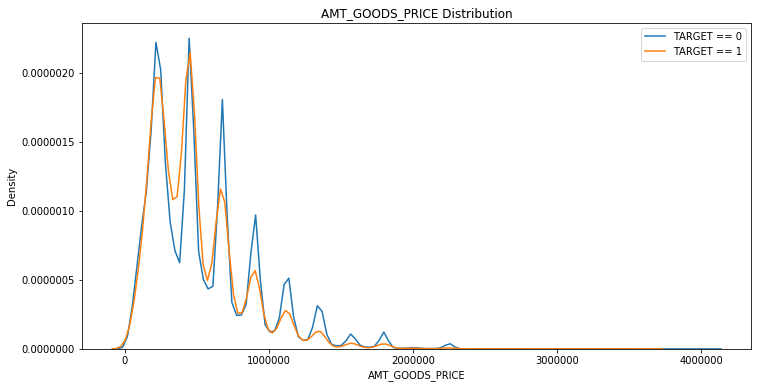

In [247]:
kde_target('AMT_GOODS_PRICE')

# AGE

The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To
see these stats in years, we multiplied by -1 and divided by the number of days in a year.

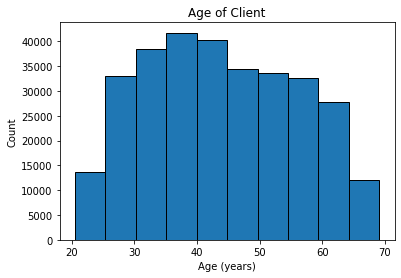

In [258]:
plt.hist(train['AGE'], edgecolor = 'k', bins = 10)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

The correlation between AGE and the TARGET is -0.0782
Median value for loan that was not repaid = 39.1288
Median value for loan that was repaid =     43.4986


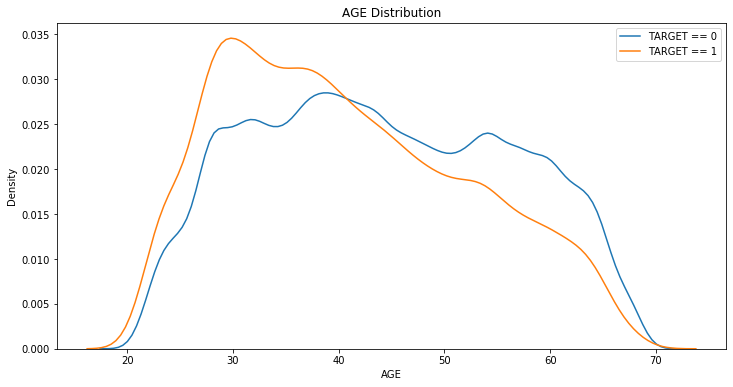

In [248]:
kde_target('AGE')


As the client gets older than 40, he seems to repay the loan on time and the clients younger than 40 are mostly delaying the
repayment of the loan, as the younger clients are less likely to repay the loan, instead of discriminating against them, it would
be smart to provide more guidance and financial planning tips to them. By doing this we can take precautionary measures to
facilitate younger clients to pay on time.

# EXPERIENCE

The numbers in the YEARS_EMPLOYED column are negative because they are recorded relative to the current loan
application. To see these stats in years, we multiplied by -1 and divided by the number of days in a year. 

The correlation between YEARS_EMPLOYED and the TARGET is -0.0750
Median value for loan that was not repaid = 3.3699
Median value for loan that was repaid =     4.6329


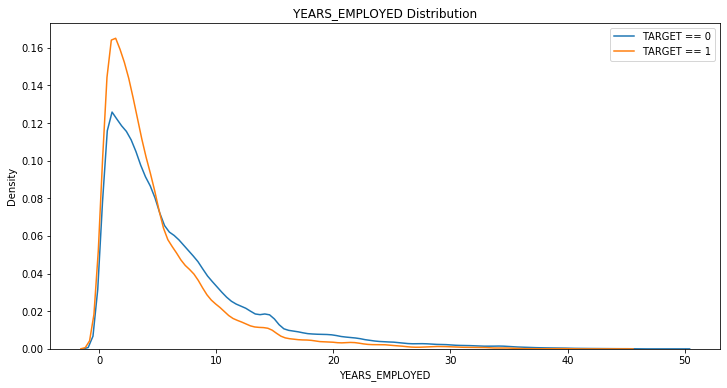

In [249]:
kde_target('YEARS_EMPLOYED')

# EXTERNAL SOURCES

All three EXT_SOURCE features have negative correlations with the target, which shows that as the value of the
EXT_SOURCE increases, the client is more likely to repay the loan.
Next we can look at the distribution of these features colored by the value of the target. This will let us visualize the effect of
this variable on the target.

The correlation between EXT_SOURCE_1 and the TARGET is -0.1553
Median value for loan that was not repaid = 0.3617
Median value for loan that was repaid =     0.5175


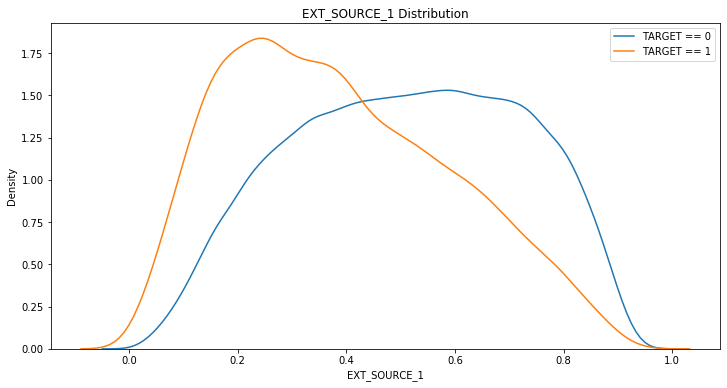

In [251]:
kde_target('EXT_SOURCE_1')

The correlation between EXT_SOURCE_2 and the TARGET is -0.1605
Median value for loan that was not repaid = 0.4404
Median value for loan that was repaid =     0.5739


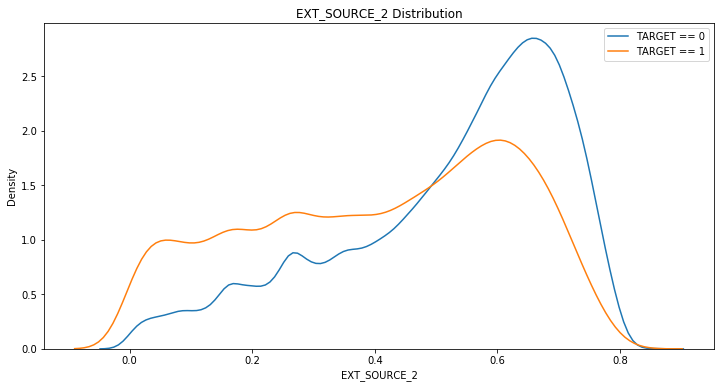

In [252]:
kde_target('EXT_SOURCE_2')

The correlation between EXT_SOURCE_3 and the TARGET is -0.1789
Median value for loan that was not repaid = 0.3791
Median value for loan that was repaid =     0.5460


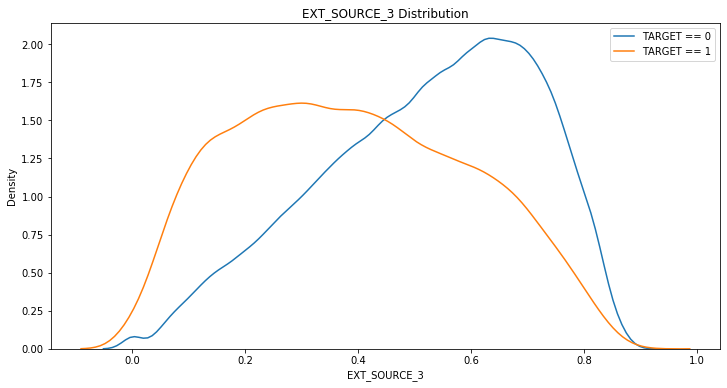

In [253]:
kde_target('EXT_SOURCE_3')

# OBS_30_CNT_SOCIAL_CIRCLE

The correlation between OBS_30_CNT_SOCIAL_CIRCLE and the TARGET is 0.0091
Median value for loan that was not repaid = 0.0000
Median value for loan that was repaid =     0.0000


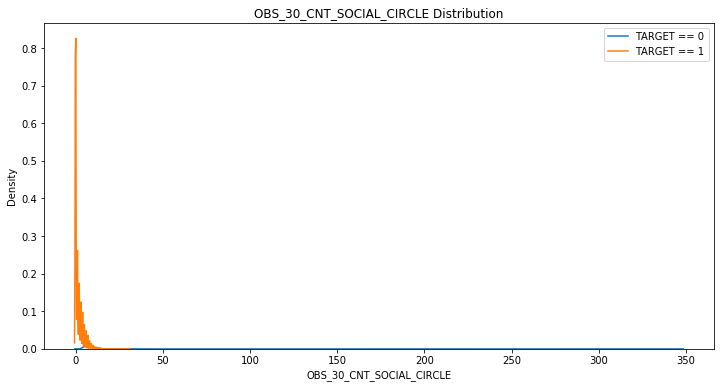

In [254]:
kde_target('OBS_30_CNT_SOCIAL_CIRCLE')

In social circle of customers, there are less than 15 people with 30 days past due, some are having very high number of
people and this can be one of the attribute for financial institute to take a decision on customer.

# OBS_60_CNT_SOCIAL_CIRCLE

The correlation between OBS_60_CNT_SOCIAL_CIRCLE and the TARGET is 0.0090
Median value for loan that was not repaid = 0.0000
Median value for loan that was repaid =     0.0000


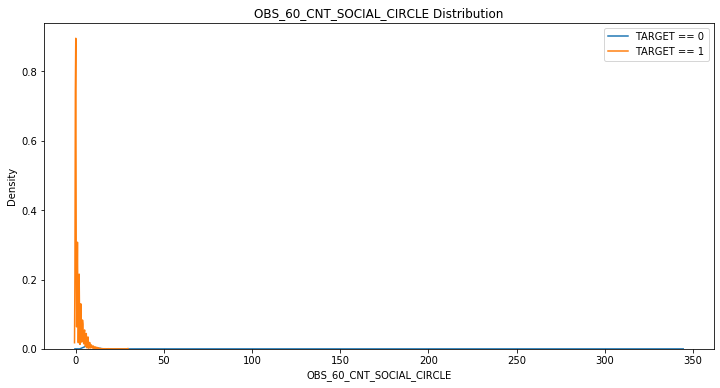

In [255]:
kde_target('OBS_60_CNT_SOCIAL_CIRCLE')

In social circle of customers, there are less than 15 people with 60 days past due, some are having very high number of
people and this can be one of the attribute for financial institute to take a decision on customer.

# HOUR_APPR_PROCESS_START

The correlation between HOUR_APPR_PROCESS_START and the TARGET is -0.0242
Median value for loan that was not repaid = 12.0000
Median value for loan that was repaid =     12.0000


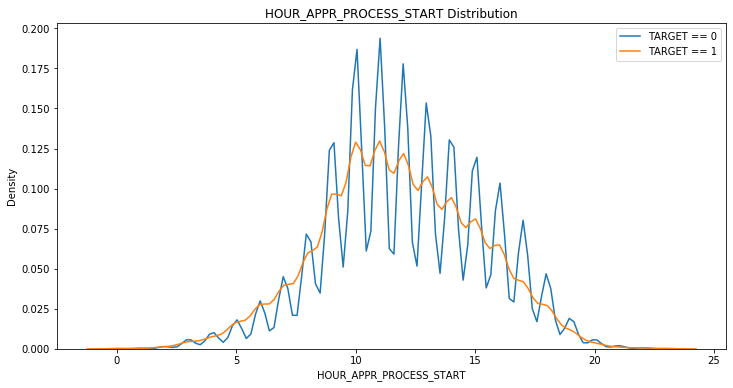

In [256]:
kde_target('HOUR_APPR_PROCESS_START')

We observe that the most of the application process is starting between 10 A.M to 1 P.M and few are after 5 P.M.

# STATISTICAL ANALYSIS

In [566]:
numeric = train.select_dtypes(include=[np.number])
categ = train.select_dtypes(exclude=[np.number]) 

In [567]:
def chisquare_test(target_variable, categorical_column):
    print('H0: There is NO association between ' + target_variable.name + ' and ' + categorical_column.name)
    print('Ha: There is an association between ' + target_variable.name + ' and ' + categorical_column.name)
    print()
    ct = pd.crosstab(target_variable, categorical_column)
    print(ct)
    chi2_ct = stats.chi2_contingency(ct)
    chival = chi2_ct[0]
    pval = chi2_ct[1]
    print()
    print('chi-val =', chival)
    print('p-val =', pval)
    print()
    rejectH0 = pval < 0.05
    if rejectH0:
        print('Reject H0')
    else:
        print('Failed to reject H0')
    print()
    print('---------------------------------------------------------------')
    return rejectH0

In [568]:
def two_sample_ttest(target_variable, numerical_column):
    print('H0: The mean of ' + numerical_column.name + ' is equal for both categories of ' + target_variable.name)
    print('Ha: The mean of ' + numerical_column.name + ' is NOT equal for both categories of ' + target_variable.name)
    print()
    grp0 = numerical_column[target_variable == 0]
    grp1 = numerical_column[target_variable == 1]
    ttest = stats.ttest_ind(grp0, grp1)
    print(ttest)
    rejectH0 = ttest[1] < 0.05
    print()
    #return rejectH0
    if rejectH0:
        print('Reject H0')
        print('\n')
        print('-------------------------------------------------------------------------')
    else:
        print('Failed to Reject H0')         
        print()
        print('-------------------------------------------------------------------------')

In [569]:
num_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_15', 'YEARS_EMPLOYED','AGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
        'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
        'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
        'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
        'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
            'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
          'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE' ]

reject = []
not_reject = []
for col in num_cols:
    rejectH0 = two_sample_ttest(numeric['TARGET'], numeric[col])
    
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
    
print('Columns Fails to reject H0 :', reject)

print()
print('Columns Reject H0 :', not_reject)

H0: The mean of CNT_CHILDREN is equal for both categories of TARGET
Ha: The mean of CNT_CHILDREN is NOT equal for both categories of TARGET

Ttest_indResult(statistic=-10.64189504948037, pvalue=1.9224915502038074e-26)

Reject H0


-------------------------------------------------------------------------
H0: The mean of AMT_INCOME_TOTAL is equal for both categories of TARGET
Ha: The mean of AMT_INCOME_TOTAL is NOT equal for both categories of TARGET

Ttest_indResult(statistic=2.2081011084695983, pvalue=0.027237960879677118)

Reject H0


-------------------------------------------------------------------------
H0: The mean of AMT_CREDIT is equal for both categories of TARGET
Ha: The mean of AMT_CREDIT is NOT equal for both categories of TARGET

Ttest_indResult(statistic=16.848601925306788, pvalue=1.1474602724788813e-63)

Reject H0


-------------------------------------------------------------------------
H0: The mean of AMT_ANNUITY is equal for both categories of TARGET
Ha: The mean of 

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of YEARS_BUILD_AVG is equal for both categories of TARGET
Ha: The mean of YEARS_BUILD_AVG is NOT equal for both categories of TARGET

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of COMMONAREA_AVG is equal for both categories of TARGET
Ha: The mean of COMMONAREA_AVG is NOT equal for both categories of TARGET

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of ELEVATORS_AVG is equal for both categories of TARGET
Ha: The mean of ELEVATORS_AVG is NOT equal for both categories of TARGET

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The m

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of ELEVATORS_MEDI is equal for both categories of TARGET
Ha: The mean of ELEVATORS_MEDI is NOT equal for both categories of TARGET

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of ENTRANCES_MEDI is equal for both categories of TARGET
Ha: The mean of ENTRANCES_MEDI is NOT equal for both categories of TARGET

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of FLOORSMAX_MEDI is equal for both categories of TARGET
Ha: The mean of FLOORSMAX_MEDI is NOT equal for both categories of TARGET

Ttest_indResult(statistic=nan, pvalue=nan)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The m

Ttest_indResult(statistic=6.441175689550016, pvalue=1.187254729043606e-10)

Reject H0


-------------------------------------------------------------------------
H0: The mean of FLAG_DOCUMENT_17 is equal for both categories of TARGET
Ha: The mean of FLAG_DOCUMENT_17 is NOT equal for both categories of TARGET

Ttest_indResult(statistic=1.8729907890240625, pvalue=0.061070604873260825)

Failed to Reject H0

-------------------------------------------------------------------------
H0: The mean of FLAG_DOCUMENT_18 is equal for both categories of TARGET
Ha: The mean of FLAG_DOCUMENT_18 is NOT equal for both categories of TARGET

Ttest_indResult(statistic=4.410014844095567, pvalue=1.0339853157449375e-05)

Reject H0


-------------------------------------------------------------------------
H0: The mean of FLAG_DOCUMENT_19 is equal for both categories of TARGET
Ha: The mean of FLAG_DOCUMENT_19 is NOT equal for both categories of TARGET

Ttest_indResult(statistic=0.7527920365497385, pvalue=0.45

In [545]:
cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
reject = []
not_reject = []

for col in cat_cols:
    chisquare_test(train['TARGET'], categ[col])
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
print()   
print('Columns Fails to Reject H0 :', reject)
print()
print('Columns Rejected H0 :', not_reject)

H0: There is NO association between TARGET and NAME_CONTRACT_TYPE
Ha: There is an association between TARGET and NAME_CONTRACT_TYPE

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       255011            27675
1                        23221             1604

chi-val = 293.15054219964554
p-val = 1.0235150721172847e-65

Reject H0

---------------------------------------------------------------
H0: There is NO association between TARGET and CODE_GENDER
Ha: There is an association between TARGET and CODE_GENDER

CODE_GENDER       F      M  XNA
TARGET                         
0            188278  94404    4
1             14170  10655    0

chi-val = 920.7913340361749
p-val = 1.1290217848908289e-200

Reject H0

---------------------------------------------------------------
H0: There is NO association between TARGET and FLAG_OWN_CAR
Ha: There is an association between TARGET and FLAG_OWN_CAR

FLAG_OWN_CAR       N      Y
TARGE

FONDKAPREMONT_MODE  not specified  org spec account  reg oper account  \
TARGET                                                                  
0                            5258              5292             68678   
1                             429               327              5152   

FONDKAPREMONT_MODE  reg oper spec account  
TARGET                                     
0                                   11288  
1                                     792  

chi-val = 16.8098972696107
p-val = 0.0007732982001133769

Reject H0

---------------------------------------------------------------
H0: There is NO association between TARGET and HOUSETYPE_MODE
Ha: There is an association between TARGET and HOUSETYPE_MODE

HOUSETYPE_MODE  block of flats  specific housing  terraced house
TARGET                                                          
0                       140053              1347            1109
1                        10450               152             103

chi-val = 2

From the above statistical analysis all the features turned out to be important. SO, let's build base model with all the features

# BASE MODEL WITH IMBALANCED DATASET

In [392]:
pd.set_option('display.max_columns', None)
train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
nud = train.select_dtypes(include=[np.number])
cad = train.select_dtypes(exclude=[np.number]) 


In [ ]:
nud  = nud.fillna(nud.median()) 

In [ ]:
cad['NAME_TYPE_SUITE'].replace(to_replace = np.nan,value = "Unaccompanied", inplace=True)
cad['OCCUPATION_TYPE'].replace(to_replace = np.nan,value = "Laborers", inplace=True)
cad['FONDKAPREMONT_MODE'].replace(to_replace = np.nan,value = "reg oper account", inplace=True)
cad['HOUSETYPE_MODE'].replace(to_replace = np.nan,value = "block of flats", inplace=True)
cad['WALLSMATERIAL_MODE'].replace(to_replace = np.nan,value = "Panel", inplace=True)
cad['EMERGENCYSTATE_MODE'].replace(to_replace = np.nan,value = "No", inplace=True)

In [ ]:
cad=pd.get_dummies(data=cad,columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],drop_first=True)

In [ ]:
cad.isna().any()[lambda x: x]

In [ ]:
nud.isna().any()[lambda x: x]

In [ ]:
dfb = pd.concat([nud,cad], axis = 1)

In [ ]:
dfb.shape

In [ ]:
X = dfb.drop(['TARGET','SK_ID_CURR'],axis =1)
y= dfb['TARGET']

In [402]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 100000)
log_reg.fit(X, y)

LogisticRegression(max_iter=100000)

In [403]:
print(f'Coefficients: {log_reg.coef_}')
print(f'Intercept: {log_reg.intercept_}')
print(f'R^2 score: {log_reg.score(X, y)}')

Coefficients: [[-1.51106155e-07 -8.61542140e-07  3.18641876e-06  2.90924430e-06
  -3.99267549e-06 -5.55709580e-09  1.01001519e-04  8.83737527e-07
   2.86802660e-05  1.00964807e-04 -8.69803708e-07 -1.35300379e-07
  -1.33519111e-07  4.26548200e-08 -1.34461149e-07 -6.66880613e-08
  -2.87296964e-08 -4.01120759e-07 -7.66631944e-08 -6.77576032e-08
  -2.38623420e-06 -3.41901669e-09 -3.70866278e-09 -3.24726981e-09
   2.55175174e-08  4.30576802e-08  3.07788476e-08 -1.14353232e-07
  -2.83006568e-07 -2.64201354e-07 -2.75927107e-08 -1.69215198e-08
  -1.34428761e-07 -1.09543111e-07 -8.65069889e-09 -2.77222892e-08
  -2.63329517e-08 -5.44854135e-08 -4.22894311e-08 -1.15368564e-08
  -1.84367829e-08 -2.73951364e-08 -1.37131637e-09 -7.64393049e-09
  -2.65113383e-08 -1.63794054e-08 -1.34335800e-07 -1.10300156e-07
  -8.06622008e-09 -2.59585092e-08 -2.50326155e-08 -5.33301732e-08
  -4.15079102e-08 -1.13358106e-08 -1.91659111e-08 -2.66274988e-08
  -1.12687861e-09 -7.43374337e-09 -2.77561017e-08 -1.66999435e

In [404]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)

## Train Scores

In [405]:
lr1 = LogisticRegression(max_iter = 100000) 
lr1.fit(X_train, y_train) 
pred = lr1.predict(X_train) 
  
# print classification report 
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    197883
           1       0.00      0.00      0.00     17374

    accuracy                           0.92    215257
   macro avg       0.46      0.50      0.48    215257
weighted avg       0.85      0.92      0.88    215257



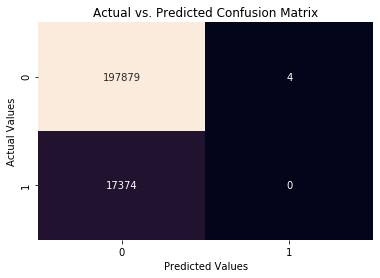

In [406]:
conf_mat = confusion_matrix(y_train, pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [407]:
a = confusion_matrix(y_train, pred)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)


In [408]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_train, pred) )
print("f1_score:",f1_score(y_train, pred) )
print("accuracy_score:",accuracy_score(y_train, pred))

Precision: 0.0
Recall: 0.0
roc_auc_Score: 0.4999898930175912
f1_score: 0.0
accuracy_score: 0.9192685952140929


## Test Scores

In [409]:
tpred = lr1.predict(X_test) 
  

print(classification_report(y_test, tpred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84803
           1       0.00      0.00      0.00      7451

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.84      0.92      0.88     92254



/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


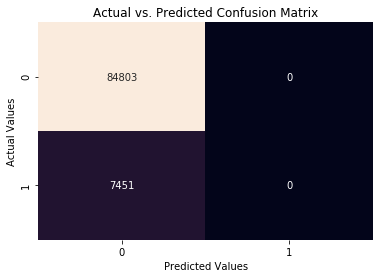

In [410]:
conf_mat = confusion_matrix(y_test, tpred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [411]:
a = confusion_matrix(y_test, tpred)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)


/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [412]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_test, tpred) )
print("f1_score:",f1_score(y_test, tpred) )
print("accuracy_score:",accuracy_score(y_test, tpred))

Precision: nan
Recall: 0.0
roc_auc_Score: 0.5
f1_score: 0.0
accuracy_score: 0.9192338543586186


# BASE MODEL WITH BALANCED DATASET

In [416]:
print("Before OverSampling, counts of label '1':",np.sum(y == 1))
print("Before OverSampling, counts of label '0':",np.sum(y == 0)) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 2) 
X_res, y_res = smt.fit_sample(X, y) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

Before OverSampling, counts of label '1': 24825
Before OverSampling, counts of label '0': 282686
After OverSampling, the shape of train_X: (565372, 228)
After OverSampling, the shape of train_y: (565372,) 

After OverSampling, counts of label '1': 282686
After OverSampling, counts of label '0': 282686


In [417]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res,y_res,test_size=0.3,random_state=15)

## Train Scores 

In [418]:
lr1 = LogisticRegression(max_iter = 100000) 
lr1.fit(X_train1, y_train1) 
pred1 = lr1.predict(X_train1) 
  

print(classification_report(y_train1, pred1))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59    197774
           1       0.58      0.54      0.56    197986

    accuracy                           0.58    395760
   macro avg       0.58      0.58      0.58    395760
weighted avg       0.58      0.58      0.58    395760



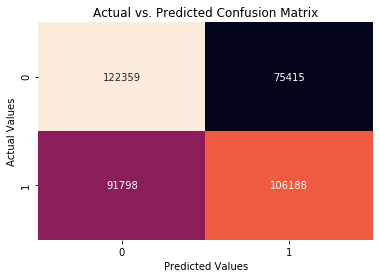

In [419]:
conf_mat = confusion_matrix(y_train1, pred1)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [420]:
a = confusion_matrix(y_train1, pred1)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [421]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_train1, pred1) )
print("f1_score:",f1_score(y_train1, pred1) )
print("accuracy_score:",accuracy_score(y_train1, pred1))

Precision: 0.5847260232485146
Recall: 0.5363409534007455
roc_auc_Score: 0.5775109360125169
f1_score: 0.5594893424203548
accuracy_score: 0.5774888821507984


## Test Scores

In [422]:
pred2 = lr1.predict(X_test1) 
#print classification report 
print(classification_report(y_test1, pred2))

              precision    recall  f1-score   support

           0       0.57      0.62      0.60     84912
           1       0.58      0.54      0.56     84700

    accuracy                           0.58    169612
   macro avg       0.58      0.58      0.58    169612
weighted avg       0.58      0.58      0.58    169612



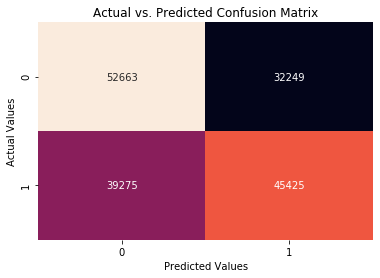

In [423]:
conf_mat = confusion_matrix(y_test1, pred2)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [424]:
a = confusion_matrix(y_test1, pred2)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [425]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_test1, pred2) )
print("f1_score:",f1_score(y_test1, pred2) )
print("accuracy_score:",accuracy_score(y_test1, pred2))

Precision: 0.5848160259546309
Recall: 0.5363046044864227
roc_auc_Score: 0.5782557034114796
f1_score: 0.5595107591116805
accuracy_score: 0.5783081385751008


# APPROACH1 : MINMAXSCALER FOR NON NORMALIZED FEATURES, GET DUMMIES FOR ALL FEATURES, FEATURE INTEGRATION

In [426]:
train = pd.read_csv('application_train.csv') 

In [427]:
train['documents'] =  np.sum(train.iloc[:,96:116] , axis = 1)

In [428]:
train['enquiries'] =  np.sum(train.iloc[:,116:122] , axis = 1)

In [429]:
train['phone'] =  np.sum(train.iloc[:,22:25] , axis = 1)

In [430]:
train.drop(['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis =1, inplace = True)

In [431]:
train["DAYS_EMPLOYED"].replace(365243.0,np.nan,inplace=True)

train["DAYS_EMPLOYED"].replace(to_replace = np.nan,value = train["DAYS_EMPLOYED"].median(), inplace=True)

In [432]:
train['YEARS_EMPLOYED'] = -train['DAYS_EMPLOYED']/365
train['AGE']  = -train['DAYS_BIRTH']/365
train['DAYS_ID_PUBLISH'] = -train['DAYS_ID_PUBLISH']
train['DAYS_REGISTRATION'] = -train['DAYS_REGISTRATION']

In [433]:
train.drop(['DAYS_EMPLOYED','DAYS_BIRTH'],axis = 1,inplace = True)

In [434]:
train["DAYS_LAST_PHONE_CHANGE"]=-train["DAYS_LAST_PHONE_CHANGE"]

In [435]:
nd = train.select_dtypes(include=[np.number])
cd = train.select_dtypes(exclude=[np.number]) 

In [436]:
nd  = nd.fillna(nd.median()) 

In [437]:
cd['NAME_TYPE_SUITE'].replace(to_replace = np.nan,value = "Unaccompanied", inplace=True)
cd['OCCUPATION_TYPE'].replace(to_replace = np.nan,value = "Laborers", inplace=True)
cd['FONDKAPREMONT_MODE'].replace(to_replace = np.nan,value = "reg oper account", inplace=True)
cd['HOUSETYPE_MODE'].replace(to_replace = np.nan,value = "block of flats", inplace=True)
cd['WALLSMATERIAL_MODE'].replace(to_replace = np.nan,value = "Panel", inplace=True)
cd['EMERGENCYSTATE_MODE'].replace(to_replace = np.nan,value = "No", inplace=True)

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [438]:
cd=pd.get_dummies(data=cd,columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],drop_first=True)

In [439]:
cd.isna().any()[lambda x: x]

Series([], dtype: bool)

In [440]:
df = pd.concat([nd,cd],axis = 1)

In [441]:
df.isnull().sum().sum()

0

In [442]:
X = df.drop(['TARGET','SK_ID_CURR'],axis =1)
y= df['TARGET']

In [443]:
DF = X.drop(X.iloc[:,22:68],axis = 1)
DF2 = X.iloc[:,22:68] 
DF2['REGION_POPULATION_RELATIVE'] = X['REGION_POPULATION_RELATIVE']
DF.drop(['REGION_POPULATION_RELATIVE'],axis = 1,inplace=True)

In [444]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
DF=pd.DataFrame(minmax.fit_transform(DF),columns=DF.columns)

In [445]:
X = pd.concat([DF,DF2],axis = 1)

In [448]:
from sklearn.linear_model import LogisticRegression

lin_reg = LogisticRegression(max_iter = 100000)
lin_reg.fit(X, y)

LogisticRegression(max_iter=100000)

In [449]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [[ 2.26446877e-01  3.43395094e-01  6.38688966e+00  2.29198418e+00
  -7.97787925e+00 -2.49904174e-01 -3.12791650e-01  4.81955761e-01
  -3.73982839e-01 -6.96865059e-02 -8.11292309e-02  2.37915398e-01
  -2.30921091e-01  5.26758837e-01 -6.96612861e-02 -2.28020737e-01
   6.95769917e-02 -1.38811451e-01  2.01396656e-01 -7.75761933e-02
   7.82809086e-02  7.76537260e-02  2.93042489e+00  1.62069154e-02
   1.87431327e+00 -2.63200202e-01 -5.60830698e-01 -5.70135916e-01
  -2.89923180e+00  3.12448934e-01 -1.16083362e+00  8.83693478e-02
  -4.73590672e-01  3.01405881e-01 -2.16768654e-01 -3.01844827e-01
   5.52271113e-02 -6.38729840e-02 -6.56609969e-02 -1.33849899e-01
   6.02135573e-02 -1.01449723e-01 -3.96435491e-02 -1.96508577e-01
   1.29686449e+00 -8.76221957e-01 -2.07611370e-01 -9.42086644e-01
   1.26408194e+00 -9.12547141e-02  5.67120983e-01  6.61517761e-01
   9.83127132e-01  8.75416855e-01 -1.46087867e-01  5.11279017e-03
  -4.00289737e-02 -6.10388968e-02 -1.45837382e-01  5.59324852e

In [450]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)

# SAMPLING ON X, Y

In [451]:
print("Before OverSampling, counts of label '1':",np.sum(y == 1))
print("Before OverSampling, counts of label '0':",np.sum(y == 0)) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 2) 
X_res, y_res = smt.fit_sample(X, y) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

Before OverSampling, counts of label '1': 24825
Before OverSampling, counts of label '0': 282686
After OverSampling, the shape of train_X: (565372, 203)
After OverSampling, the shape of train_y: (565372,) 

After OverSampling, counts of label '1': 282686
After OverSampling, counts of label '0': 282686


# SCORES WITH SAMPLING ON X

## Logistic Regression

In [452]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res,y_res,test_size=0.3,random_state=15)

### Train Scores:

In [453]:
lr1 = LogisticRegression() 
lr1.fit(X_train1, y_train1) 
trainpred2 = lr1.predict(X_train1) 
  
 
print(classification_report(y_train1, trainpred2)) 

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.71      0.70      0.70    197774
           1       0.70      0.71      0.71    197986

    accuracy                           0.71    395760
   macro avg       0.71      0.71      0.71    395760
weighted avg       0.71      0.71      0.71    395760



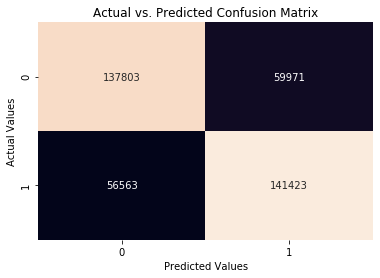

In [454]:
conf_mat = confusion_matrix(y_train1, trainpred2)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [455]:
a = confusion_matrix(y_train1, trainpred2)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [457]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_train1, trainpred2) )
print("f1_score:",f1_score(y_train1, trainpred2) )
print("accuracy_score:",accuracy_score(y_train1, trainpred2))

Precision: 0.7022205229550036
Recall: 0.7143080823896639
roc_auc_Score: 0.7055390665267766
f1_score: 0.7082127297310832
accuracy_score: 0.7055437638973115


### TestScores:

In [458]:
predictions1 = lr1.predict(X_test1) 
print(classification_report(y_test1, predictions1)) 

              precision    recall  f1-score   support

           0       0.71      0.70      0.71     84912
           1       0.70      0.72      0.71     84700

    accuracy                           0.71    169612
   macro avg       0.71      0.71      0.71    169612
weighted avg       0.71      0.71      0.71    169612



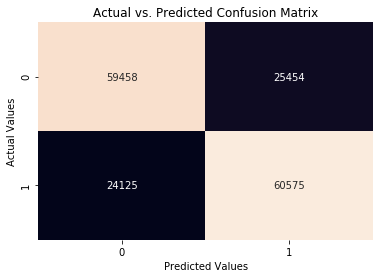

In [459]:
conf_mat = confusion_matrix(y_test1, predictions1)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [461]:
a = confusion_matrix(y_test1, predictions1)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [462]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_test1, predictions1) )
print("f1_score:",f1_score(y_test1, predictions1) )
print("accuracy_score:",accuracy_score(y_test1, predictions1))

Precision: 0.704123028281161
Recall: 0.7151711924439197
roc_auc_Score: 0.7077010098266329
f1_score: 0.7096041094365925
accuracy_score: 0.7076916727590029


## Decision Tree 

### Train Scores: 

In [463]:
giniDecisionTree2 = DecisionTreeClassifier(criterion='gini')

giniDecisionTree2.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [464]:
trainpred3 = giniDecisionTree2.predict(X_train1)
print(classification_report(y_train1, trainpred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197774
           1       1.00      1.00      1.00    197986

    accuracy                           1.00    395760
   macro avg       1.00      1.00      1.00    395760
weighted avg       1.00      1.00      1.00    395760



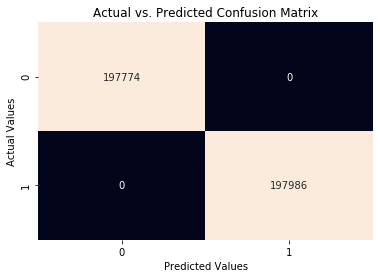

In [465]:
conf_mat = confusion_matrix(y_train1, trainpred3)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [468]:
a = confusion_matrix(y_train1, trainpred3)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [469]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_train1, trainpred3) )
print("f1_score:",f1_score(y_train1, trainpred3) )
print("accuracy_score:",accuracy_score(y_train1, trainpred3))

Precision: 1.0
Recall: 1.0
roc_auc_Score: 1.0
f1_score: 1.0
accuracy_score: 1.0


### Test Scores:

In [470]:
giniPred2 = giniDecisionTree2.predict(X_test1)
print(classification_report(y_test1, giniPred2))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     84912
           1       0.89      0.91      0.90     84700

    accuracy                           0.90    169612
   macro avg       0.90      0.90      0.90    169612
weighted avg       0.90      0.90      0.90    169612



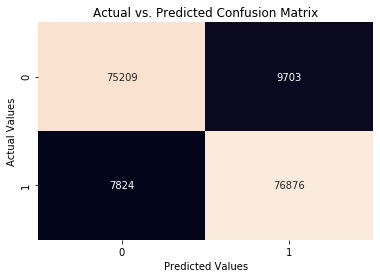

In [471]:
conf_mat = confusion_matrix(y_test1, giniPred2)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [473]:
a = confusion_matrix(y_test1, giniPred2)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [474]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_test1, giniPred2) )
print("f1_score:",f1_score(y_test1, giniPred2) )
print("accuracy_score:",accuracy_score(y_test1, giniPred2))

Precision: 0.887928943508241
Recall: 0.9076269185360094
roc_auc_Score: 0.8966778365056155
f1_score: 0.8976698836401427
accuracy_score: 0.8966641511213829


## APPROACH2 :  Scores with Label encoder for multi class variables and get dummies for binary variables, with feature engineering , Standard scaler


In [140]:
train = pd.read_csv('application_train.csv')

In [141]:
train['documents'] =  np.sum(train.iloc[:,96:116] , axis = 1)
train['enquiries'] =  np.sum(train.iloc[:,116:122] , axis = 1)
train['phone'] =  np.sum(train.iloc[:,22:25] , axis = 1)

In [142]:
train.drop(['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis =1, inplace = True)

In [143]:
train["DAYS_EMPLOYED"].replace(365243.0,np.nan,inplace=True)

In [144]:
train['YEARS_EMPLOYED'] = -train['DAYS_EMPLOYED']/365
train['AGE']  = -train['DAYS_BIRTH']/365
train['DAYS_ID_PUBLISH'] = -train['DAYS_ID_PUBLISH']
train['DAYS_REGISTRATION'] = -train['DAYS_REGISTRATION']

In [145]:
train.drop(['DAYS_EMPLOYED','DAYS_BIRTH'],axis = 1,inplace = True)

In [146]:
nd = train.select_dtypes(include=[np.number])
cd = train.select_dtypes(exclude=[np.number])  

In [147]:
nd = nd.fillna(nd.median())

In [148]:
cd['NAME_TYPE_SUITE'].replace(to_replace = np.nan,value = "Unaccompanied", inplace=True)
cd['OCCUPATION_TYPE'].replace(to_replace = np.nan,value = "Laborers", inplace=True)
cd['FONDKAPREMONT_MODE'].replace(to_replace = np.nan,value = "reg oper account", inplace=True)
cd['HOUSETYPE_MODE'].replace(to_replace = np.nan,value = "block of flats", inplace=True)
cd['WALLSMATERIAL_MODE'].replace(to_replace = np.nan,value = "Panel", inplace=True)
cd['EMERGENCYSTATE_MODE'].replace(to_replace = np.nan,value = "No", inplace=True)

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [149]:
cd['OCCUPATION_TYPE'] = cd["OCCUPATION_TYPE"].replace({
    "Cleaning staff":1,     
    "Low-skill Laborers":2, 
    "Cooking staff":3,
    "Waiters/barmen staff":4,
    "Security staff":5,
    "Medicine staff":6,
    "Sales staff":7,
    "Secretaries":8,
    "Laborers":9,
    "Core staff":10,
    "Private service staff":11,
    "High skill tech staff":12,
    "Drivers":13,
    "HR staff":14,
    "Accountants":15,
    "Realty agents":16,
    "IT staff":17,
    "Managers":18,
})

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [150]:
cd['NAME_EDUCATION_TYPE'] = cd["NAME_EDUCATION_TYPE"].replace({"Lower secondary":1,
                                     "Secondary / secondary special":2,
                                     "Incomplete higher":3,
                                     "Higher education":4,
                                     "Academic degree":5
})

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [151]:
cd['ORGANIZATION_TYPE'] = cd["ORGANIZATION_TYPE"].replace({ 
                                        "Postal"                    :1,
                                        "XNA"                       :2,
                                        "Kindergarten"              :3,
                                        "Agriculture"               :4,
                                        "Industry: type 13"         :5,
                                        "Industry: type 3"          :6,
                                        "Cleaning"                  :7,
                                        "School"                    :8,
                                        "Medicine"                  :9,
                                        "Restaurant"                :10,
                                        "Hotel"                     :11,
                                        "Housing"                   :12,
                                        "Trade: type 3"             :13,
                                        "Government"                :14,
                                        "Industry: type 11"         :15,
                                        "Industry: type 7"          :16,
                                        "Trade: type 1"             :17,
                                        "Security"                  :18,
                                        "Self-employed"             :19,
                                        "Trade: type 7"             :20,
                                        "Business Entity Type 2"    :21,
                                        "Industry: type 6"          :22,
                                        "Industry: type 2"          :23,
                                        "Mobile"                    :24,
                                        "Industry: type 8"          :25,
                                        "Electricity"               :26,
                                        "Industry: type 1"          :27,
                                        "Other"                     :28,
                                        "Culture"                   :29,
                                        "Religion"                  :30,
                                        "Industry: type 5"          :31,
                                        "Transport: type 2"         :32,
                                        "Transport: type 3"         :33,
                                        "Telecom"                   :34,
                                        "Industry: type 4"          :35,
                                        "Trade: type 6"             :36,
                                        "Trade: type 5"             :37,
                                        "Emergency"                 :38,
                                        "Business Entity Type 1"    :39,
                                        "Services"                  :40,
                                        "University"                :41,
                                        "Industry: type 12"         :42,
                                        "Transport: type 1"         :43,
                                        "Business Entity Type 3"    :44,
                                        "Transport: type 4"         :45,
                                        "Trade: type 2"             :46,
                                        "Trade: type 4"             :47,
                                        "Industry: type 10"         :48,
                                        "Bank"                      :49,
                                        "Construction"              :50,
                                        "Industry: type 9"          :51,
                                        "Insurance"                 :52,
                                        "Security Ministries"       :53,
                                        "Advertising"               :54,
                                        "Police"                    :55,
                                        "Realtor"                   :56,
                                        "Military"                  :57,
                                        "Legal Services"            :58
})

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [152]:
cd=pd.get_dummies(data=cd,columns=[ 'NAME_CONTRACT_TYPE','FLAG_OWN_CAR', 'FLAG_OWN_REALTY','EMERGENCYSTATE_MODE'],drop_first=True)

In [153]:
cd['CODE_GENDER'] = LabelEncoder().fit_transform(cd['CODE_GENDER'].tolist())
cd['NAME_TYPE_SUITE'] = LabelEncoder().fit_transform(cd['NAME_TYPE_SUITE'].tolist())
cd['NAME_INCOME_TYPE'] = LabelEncoder().fit_transform(cd['NAME_INCOME_TYPE'].tolist())
cd['NAME_FAMILY_STATUS'] = LabelEncoder().fit_transform(cd['NAME_FAMILY_STATUS'].tolist())
cd['NAME_HOUSING_TYPE'] = LabelEncoder().fit_transform(cd['NAME_HOUSING_TYPE'].tolist())
cd['WEEKDAY_APPR_PROCESS_START'] = LabelEncoder().fit_transform(cd['WEEKDAY_APPR_PROCESS_START'].tolist())
cd['FONDKAPREMONT_MODE'] = LabelEncoder().fit_transform(cd['FONDKAPREMONT_MODE'].tolist())
cd['HOUSETYPE_MODE'] = LabelEncoder().fit_transform(cd['HOUSETYPE_MODE'].tolist())
cd['WALLSMATERIAL_MODE'] = LabelEncoder().fit_transform(cd['WALLSMATERIAL_MODE'].tolist())


In [154]:
df = pd.concat([nd,cd],axis = 1)

In [155]:
df.isnull().sum().sum()

0

In [156]:
X = df.drop(['TARGET','SK_ID_CURR'],axis =1)
y= df['TARGET']

In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [158]:
print("Before OverSampling, counts of label '1':",np.sum(y == 1))
print("Before OverSampling, counts of label '0':",np.sum(y == 0)) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 2) 
X_res, y_res = smt.fit_sample(X, y) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

Before OverSampling, counts of label '1': 24825
Before OverSampling, counts of label '0': 282686
After OverSampling, the shape of train_X: (565372, 95)
After OverSampling, the shape of train_y: (565372,) 

After OverSampling, counts of label '1': 282686
After OverSampling, counts of label '0': 282686


In [159]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res,y_res,test_size=0.3,random_state=15)

# Logistic Regression

## Train Scores 

In [177]:
lr1 = LogisticRegression(max_iter = 100000) 
lr1.fit(X_train1, y_train1) 
trainpred2 = lr1.predict(X_train1) 
  
# print classification report 
print(classification_report(y_train1, trainpred2)) 

              precision    recall  f1-score   support

           0       0.70      0.69      0.70    197774
           1       0.69      0.70      0.70    197986

    accuracy                           0.70    395760
   macro avg       0.70      0.70      0.70    395760
weighted avg       0.70      0.70      0.70    395760



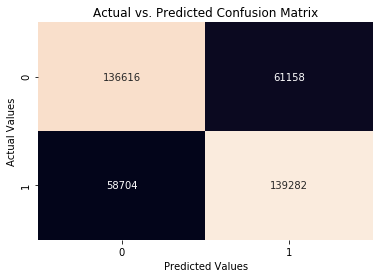

In [178]:
conf_mat = confusion_matrix(y_train1, trainpred2)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [179]:
a = confusion_matrix(y_train1, trainpred2)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [180]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_train1, trainpred2) )
print("f1_score:",f1_score(y_train1, trainpred2) )
print("accuracy_score:",accuracy_score(y_train1, trainpred2))

Precision: 0.6948812612253044
Recall: 0.7034941864576283
roc_auc_Score: 0.6971312185435673
f1_score: 0.6991611993193215
accuracy_score: 0.6971346270466949


## Test Scores 

In [181]:
predictions1 = lr1.predict(X_test1) 
  
# print classification report 
print(classification_report(y_test1, predictions1))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     84912
           1       0.69      0.70      0.70     84700

    accuracy                           0.70    169612
   macro avg       0.70      0.70      0.70    169612
weighted avg       0.70      0.70      0.70    169612



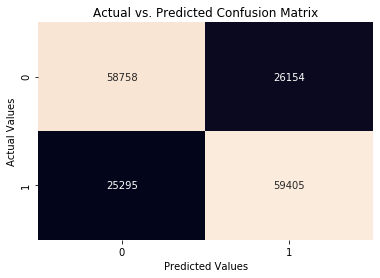

In [182]:
conf_mat = confusion_matrix(y_test1, predictions1)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [183]:
a = confusion_matrix(y_test1, predictions1)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [184]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_test1, predictions1) )
print("f1_score:",f1_score(y_test1, predictions1) )
print("accuracy_score:",accuracy_score(y_test1, predictions1))

Precision: 0.6943162028541708
Recall: 0.701357733175915
roc_auc_Score: 0.6966723657400208
f1_score: 0.6978192048584803
accuracy_score: 0.6966665094450865


# Decision Tree

## Train Scores

In [168]:
giniDecisionTree2 = DecisionTreeClassifier(criterion='gini')

giniDecisionTree2.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [169]:
trainpred3 = giniDecisionTree2.predict(X_train1)
print(classification_report(y_train1, trainpred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197774
           1       1.00      1.00      1.00    197986

    accuracy                           1.00    395760
   macro avg       1.00      1.00      1.00    395760
weighted avg       1.00      1.00      1.00    395760



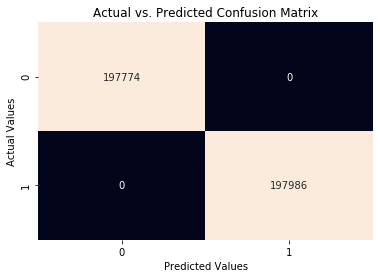

In [170]:
conf_mat = confusion_matrix(y_train1, trainpred3)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [171]:
a = confusion_matrix(y_train1, trainpred3)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [172]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_train1, trainpred3) )
print("f1_score:",f1_score(y_train1, trainpred3) )
print("accuracy_score:",accuracy_score(y_train1, trainpred3))

Precision: 1.0
Recall: 1.0
roc_auc_Score: 1.0
f1_score: 1.0
accuracy_score: 1.0


## Test Scores 

In [173]:
giniPred2 = giniDecisionTree2.predict(X_test1)
print(classification_report(y_test1, giniPred2))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     84912
           1       0.87      0.90      0.89     84700

    accuracy                           0.89    169612
   macro avg       0.89      0.89      0.89    169612
weighted avg       0.89      0.89      0.89    169612



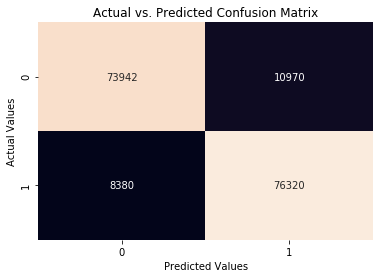

In [174]:
conf_mat = confusion_matrix(y_test1, giniPred2)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [175]:
a = confusion_matrix(y_test1, giniPred2)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [176]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_test1, giniPred2) )
print("f1_score:",f1_score(y_test1, giniPred2) )
print("accuracy_score:",accuracy_score(y_test1, giniPred2))

Precision: 0.8743269561232673
Recall: 0.9010625737898466
roc_auc_Score: 0.8859349989733103
f1_score: 0.8874934589220302
accuracy_score: 0.885916090842629
